In [21]:
# Importing required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Get the current working directory of this Jupyter notebook
os.getcwd()

'C:\\Users\\anike'

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

### Load flowers dataset

In [25]:
# Load the data set in your current working directory using the URL provided
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url,  cache_dir = '.', untar = True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [27]:
# Check the directory in which the photos are save
data_dir

'.\\datasets\\flower_photos'

In [29]:
# Check the contents of the data_dir directory
for i in os.listdir(data_dir):
    print(i)

daisy
dandelion
flower_photos
LICENSE.txt
roses
sunflowers
tulips


In [31]:
# Convert the data directory in a pathlib object
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [35]:
# Get the images having .jpg as extension: Get 5 images
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [348]:
# Find the number of images having .jpg extension
len(list(data_dir.glob('*/*.jpg')))

3670


In [37]:
# Get first 5 rose images as pathlib form
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

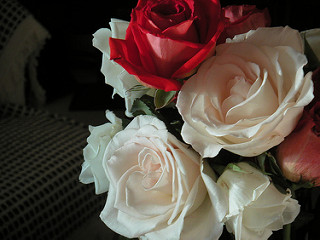

In [39]:
# Get the second rose image by specufying the rose folder
PIL.Image.open(str(roses[1]))

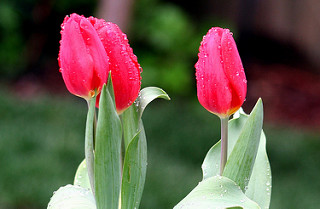

In [41]:
# Get the first tulip picture
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

### Read flowers images from disk into numpy array using opencv

In [43]:
# Creating a image dictionary that stores the respective images
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [45]:
# Set the Flower labels, strating from roses as 0
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [47]:
# Check the image dictinary works perfectly or not
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [49]:
# Use OpenCv module to read the first image in 'roses' folder into a cv object
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [51]:
# Check the shape of the image just read in the above code
img.shape # So, img is a matrix of image pixel values having shape (240,179,3)

(240, 179, 3)

In [53]:
# Resize the images into the shape of (180,180,3) using the resize method of cv2 library
cv2.resize(img,(180,180)).shape

(180, 180, 3)

### Separating independent set as X and independent set as y by running a for loop

In [59]:
# Creating empty lists to store the independent and dependent sets
X, y = [], []

# Run the for loop, get images using str(image) and at last append in X and y
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [61]:
# How X looks like?
X[0] # See, it is a three dimensional matrix like structure (3D tensor)

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [63]:
# How y looks like?
y[:5] # First five images belong to rose caegory and the label for rose category is 0

[0, 0, 0, 0, 0]

In [65]:
# Converting the X and y variables into array format
X = np.array(X)
y = np.array(y)

### Train test split the X and y data sets using sklearn

In [68]:
# Import the train_test_split function from sklearn's model_selection module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Check the shapes of respective train and test data sets
print('Shape of X train is:', X_train.shape)
print('Shape of X test is:', X_test.shape)
print('Shape of y train is:', y_train.shape)
print('Shape of y test is:', y_test.shape)

Shape of X train is: (2752, 180, 180, 3)
Shape of X test is: (918, 180, 180, 3)
Shape of y train is: (2752,)
Shape of y test is: (918,)


### Preprocessing: scale images: Scaling the X_train and X_test images
* Divide them by their highest entry 255
* Store them as X_train_scaled and X_test_scaled

In [72]:
# Scaling X_train and X_test by dividing them by 255
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Build convolutional neural network and train it: Model building, compiling, training
* Number of output classes is 5
* 

In [74]:
# Define number of output classes
num_classes = 5

# Define and build the model
model = keras.Sequential([
    # First CNN layer with 16 filters of size (3,3), relu activation and padding is present
    keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    keras.layers.MaxPooling2D(), # First Max polling layer
    # Second CNN layer with 32 filters of size (3,3), relu activation and padding is present
    keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    keras.layers.MaxPooling2D(), # Second Max polling layer
    # Third CNN layer with 64 filters of size (3,3), padding is present and rely activation
    keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    keras.layers.MaxPooling2D(),
    # The Deep Neural Network Architecture starts here
    keras.layers.Flatten(), # Flattened input layer
    keras.layers.Dense(128, activation = 'relu'), # Hidden layer with 128 neurons and relu activation
    keras.layers.Dense(num_classes) # Output layer with 5 possible output neurons: We are using linear activation here by default
])

# Compile the model with following parameters
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
              
# Train the model with X_train_scaled and y_train with 30 epochs
model.fit(X_train_scaled, y_train, epochs = 30)            

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.3724 - loss: 1.4335
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.6175 - loss: 0.9632
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.7149 - loss: 0.7784
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.7483 - loss: 0.6180
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 195ms/step - accuracy: 0.8407 - loss: 0.4511
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 189ms/step - accuracy: 0.8897 - loss: 0.3287
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 191ms/step - accuracy: 0.9593 - loss: 0.1585
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 190ms/step - accuracy: 0.9655 - loss: 0.1247
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 190ms/step - accuracy: 0.9860 - loss: 0.0573
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 198ms/step - accuracy: 0.9939 - loss: 0.0310
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 189ms/step - accuracy: 0.9902 - loss: 0.0397
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16

In [76]:
# Evaluate the model's performance on the unseen test data by using the .evaluate method
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6878 - loss: 1.9900


[2.055182933807373, 0.6797385811805725]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [78]:
# Predicting the outcomes using the .predict() method on X_test_scaled
predictions = model.predict(X_test_scaled)
predictions[0] # Get the first prediction

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


array([  3.8063862,  17.118082 ,  -6.385633 , -15.750375 , -11.512083 ],
      dtype=float32)

In [80]:
# Converting the first prediction into probability scores using softmax function under the nn library of tensorflow
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.6550196e-06, 9.9999833e-01, 6.2010515e-11, 5.3138527e-15,
       3.6819387e-13], dtype=float32)>

In [82]:
# Get the index, having highest probability score
np.argmax(score)

1

In [84]:
# Check the class in first prediction is same or not with the first sample of y_test 
y_test[0]

1

### Improve Test Accuracy Using Data Augmentation

In [93]:
# Define the image height and image width at first
img_height, img_width = 180,180

# Define the transformation objects needed and store them in data_augmentation object
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal", input_shape = (img_height, img_width, 3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1)
])

##### Check the original image in X

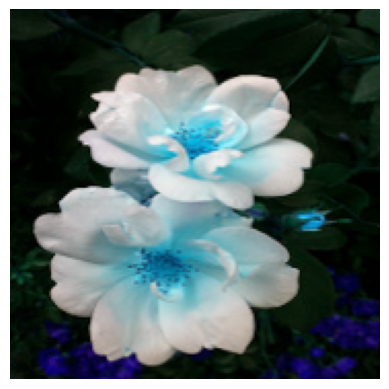

In [100]:
plt.axis('off')
plt.imshow(X[0])

##### Newly generated training sample using data augmentation function

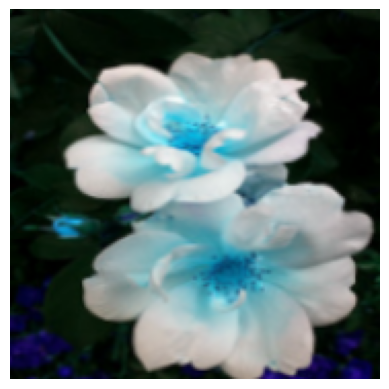

In [103]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

### Train the model using data augmentation and a drop out layer
* 

In [106]:
# Define the number of output classes
num_classes = 5

# Define and build the model
model = keras.Sequential([
  data_augmentation,
  # First CNN layer with 16 filters of shape (3,3) each, paddin is present and relu activation
  keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
  keras.layers.MaxPooling2D(),
  # Second CNN layer with 32 filters of shape (3,3) each, paddin is present and relu activation
  keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
  keras.layers.MaxPooling2D(),
  # Third CNN layer with 64 filters of shape (3,3) each, paddin is present and relu activation
  keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
  keras.layers.MaxPooling2D(),
  # Drop out layer with dropping probability of 0.2
  keras.layers.Dropout(0.2),
  # Deep Neural Network Architecture starts here
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation = 'relu'),
  keras.layers.Dense(num_classes) # Linear activation is used
])

# Compile the model
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])
              
# Train the model with X_train_scaled, y_train and 30 epochs
model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 239ms/step - accuracy: 0.3537 - loss: 1.4745
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 264ms/step - accuracy: 0.5845 - loss: 1.0551
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 277ms/step - accuracy: 0.6140 - loss: 0.9719
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 277ms/step - accuracy: 0.6807 - loss: 0.8295
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 272ms/step - accuracy: 0.6839 - loss: 0.8301
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 276ms/step - accuracy: 0.7166 - loss: 0.7595
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 257ms/step - accuracy: 0.7015 - loss: 0.7689
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 240ms/step - accuracy: 0.7368 - loss: 0.6793
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 257ms/step - accuracy: 0.7482 - loss: 0.6606
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 245ms/step - accuracy: 0.7566 - loss: 0.6465
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 239ms/step - accuracy: 0.7646 - loss: 0.6127
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 22

In [108]:
# Check the model's performance on unseen test data by using .evaluate() method
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7305 - loss: 0.9806


[0.9743146896362305, 0.7483659982681274]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**